# Support Vector Machines

* Here we implement Multiclass MNIST digit recognition classifier with SVMs

In [2]:
# Import libraries

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from pandas.plotting import scatter_matrix
from sklearn.preprocessing import OrdinalEncoder
from sklearn.model_selection import train_test_split


from keras.datasets import mnist
from sklearn.svm import SVC 
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, classification_report
from sklearn.metrics import plot_roc_curve, roc_auc_score
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.pipeline import Pipeline
from sklearn.metrics import plot_confusion_matrix
from sklearn.model_selection import cross_val_score, GridSearchCV, StratifiedShuffleSplit

## Loading MNIST dataset

In [3]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()

In [4]:
print('Shape of training features: ', X_train.shape)
print('Shape of training labels: ', y_train.shape)
print('Shape of test features: ', X_test.shape)
print('Shape of test labels: ', y_train.shape)


Shape of training features:  (60000, 28, 28)
Shape of training labels:  (60000,)
Shape of test features:  (10000, 28, 28)
Shape of test labels:  (60000,)


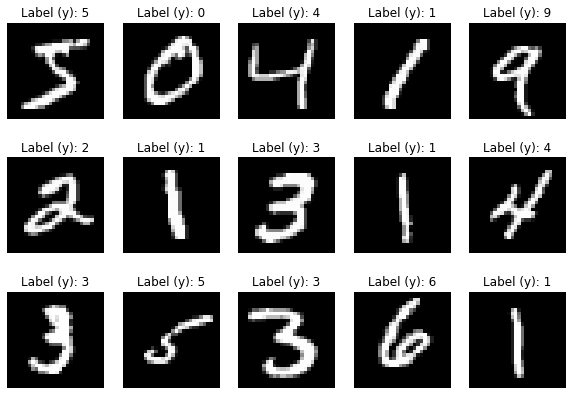

In [5]:
fig = plt.figure(figsize=(10,7))
for i in range(15):
    ax = fig.add_subplot(3, 5, i+1)
    ax.imshow(X_train[i], cmap=plt.get_cmap('gray'))
    ax.set_title('Label (y): {y}'.format(y=y_train[i]))
    plt.axis('off')

In [6]:
X_train = X_train.reshape(X_train.shape[0], 28*28)
X_test = X_test.reshape(X_test.shape[0], 28*28)

#Normalising
X_train = X_train/255
X_test = X_test/255

## Linear SVM for MNIST multiclass classification

In [7]:
pipe_1 = Pipeline([('scaler', MinMaxScaler()),
                    ('classifier', SVC(kernel='linear', C=1))])

pipe_1.fit(X_train, y_train)

acc = cross_val_score(pipe_1, X_train, y_train, cv=2)
print('Training accuracy: {:.2f} %'.format(acc.mean()*100))

Training accuracy: 92.75 %


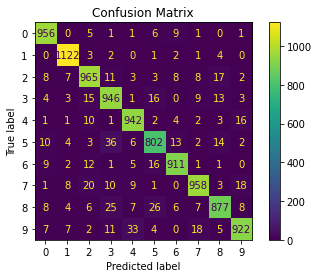

In [8]:
y_pred = pipe_1.predict(X_test)
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()
plt.title('Confusion Matrix')
plt.show()

In [9]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.95      0.98      0.96       980
           1       0.97      0.99      0.98      1135
           2       0.93      0.94      0.93      1032
           3       0.91      0.94      0.92      1010
           4       0.94      0.96      0.95       982
           5       0.91      0.90      0.91       892
           6       0.96      0.95      0.95       958
           7       0.95      0.93      0.94      1028
           8       0.94      0.90      0.92       974
           9       0.95      0.91      0.93      1009

    accuracy                           0.94     10000
   macro avg       0.94      0.94      0.94     10000
weighted avg       0.94      0.94      0.94     10000



## Nonlinear SVM for MNIST multiclass classification

In [10]:
pipe_2 = Pipeline([('scaler', MinMaxScaler()),
                    ('classifier', SVC(kernel='rbf', gamma =0.1, C=1))])

pipe_2.fit(X_train, y_train)

acc = cross_val_score(pipe_2, X_train, y_train, cv=2)
print('Training accuracy: {:.2f} %'.format(acc.mean()*100))

Training accuracy: 92.64 %


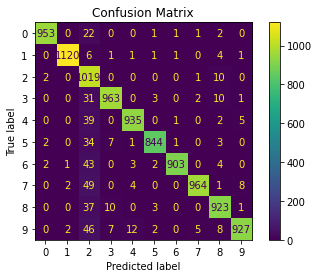

In [11]:
y_pred = pipe_2.predict(X_test)
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()
plt.title('Confusion Matrix')
plt.show()

In [12]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.99      0.97      0.98       980
           1       1.00      0.99      0.99      1135
           2       0.77      0.99      0.86      1032
           3       0.97      0.95      0.96      1010
           4       0.98      0.95      0.96       982
           5       0.99      0.95      0.97       892
           6       1.00      0.94      0.97       958
           7       0.99      0.94      0.96      1028
           8       0.95      0.95      0.95       974
           9       0.98      0.92      0.95      1009

    accuracy                           0.96     10000
   macro avg       0.96      0.95      0.96     10000
weighted avg       0.96      0.96      0.96     10000



### Using GridSearchCV for HPT 

In [13]:
scaler = StandardScaler()

X_train =  scaler.fit_transform(X_train)
X_test = scaler.fit_transform(X_test)

C_range = np.logspace(-2, 10, 13)
gamma_range = np.logspace(-9, 3, 13)
param_grid = dict(gamma = gamma_range, C = C_range)
cv = StratifiedShuffleSplit(n_splits=3, test_size=0.2, random_state=42)
grid = GridSearchCV(SVC(kernel = 'rbf'), param_grid=param_grid, cv=cv)
grid.fit(X_train, y_train)

print("The best parameters are %s with a score of %0.2f" %(grid.best_params_, grid.best_score_))

In [ ]:
y_pred = grid.best_estimator_.predict(X_test)
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()
plt.title('Confusion Matrix')
plt.show()

In [ ]:
print(classification_report(y_test, y_pred))